In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os
import ProbabilisticParcellation.util as ut
from copy import deepcopy



## Explore functional profiles in M1-M4 regions 

In [115]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)

Data_all_individ = pd.read_csv(ut.export_dir + '/Profiles/' +
                       'NettekovenSym32_profile_individ.tsv', delimiter='\t')
Data_all_group = pd.read_csv(ut.export_dir + '/Profiles/' +
                               'NettekovenSym32_profile_group.tsv', delimiter='\t')


# !!!! XX REMOVE AFTER SWAPPING M2 AND A1 XX !!!!
swap_labels = {'M2L': 'A1L', 'M2R': 'A1R', 'A1L': 'M2L', 'A1R': 'M2R'}
swap_index = [regions.index(swap_labels.get(x, x)) for x in regions]

# Swap M2 and A1 columns in Data and Data_norm
Data[regions] = Data[regions].iloc[:, swap_index]
Data_norm[regions] = Data_norm[regions].iloc[:, swap_index]
Data_all_individ[regions] = Data_all_individ[regions].iloc[:, swap_index]
Data_all_group[regions] = Data_all_group[regions].iloc[:, swap_index]
features = features[:, swap_index]


# TAKE SWAPPING ABOVE OUT AFTER SWAPPING REGIONS IN MODEL

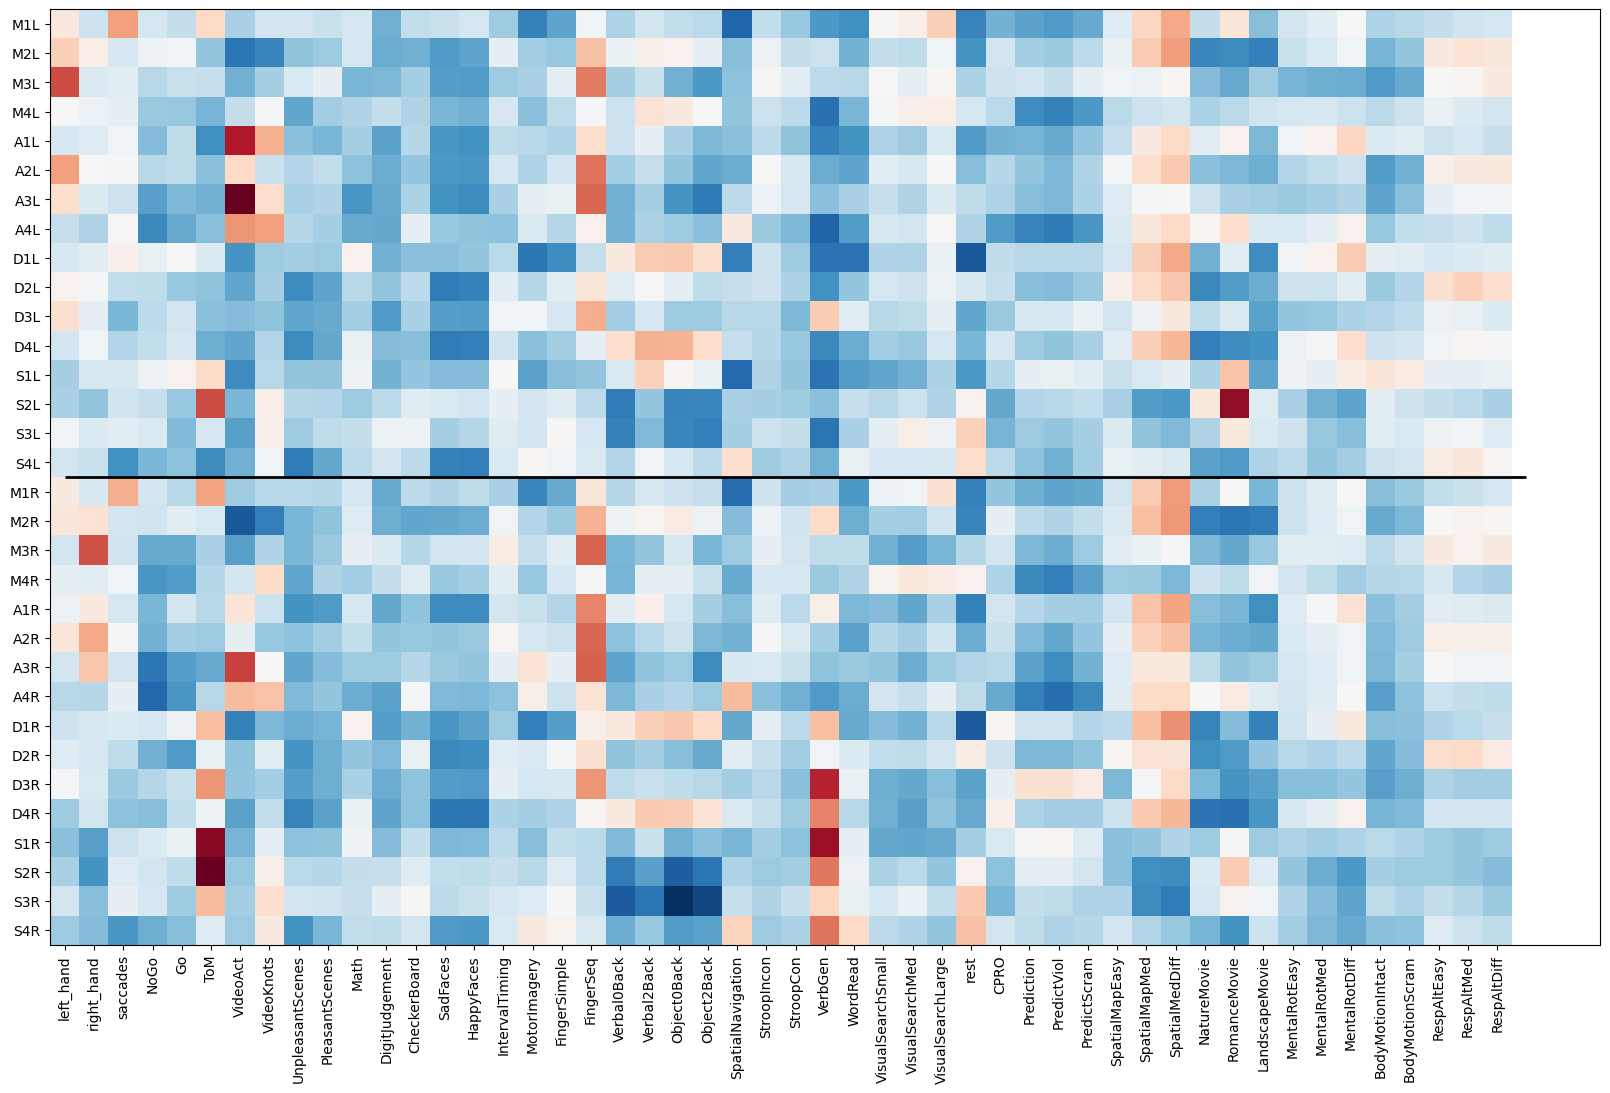

In [116]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)


# Compare with action regions

In [120]:
motor_regions = ['M1L','M1R','M2L','M2R','M3L','M3R','M4L','M4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]
action_regions = ['A1L','A1R','A2L','A2R','A3L','A3R','A4L','A4R']
select_regions = motor_regions + action_regions
select_colors = reg_colors + reg_colors

In [11]:
def normalize(data, axis=0):
    """Normalize data by subtracting the mean of each column and dividing by the standard deviation.
    """
    data = deepcopy(data)
    data -= data.mean(axis=axis)
    data /= data.std(axis=axis)

    return data

In [117]:
Somatotopic = Data_all_individ[Data_all_individ.dataset == 'Somatotopic']
# Zstandardize columns
# Somatotopic[regions] = normalize(Somatotopic[regions])

Pontine = Data_all_individ[Data_all_individ.dataset == 'Pontine']
# Pontine[regions] = normalize(Pontine[regions])

IBC = Data_all_individ[Data_all_individ.dataset == 'IBC']
# IBC[regions] = normalize(IBC[regions])

Nishimoto = Data_all_individ[Data_all_individ.dataset == 'Nishimoto']
# Nishimoto[regions] = normalize(Nishimoto[regions])


Somatotopic_group = Data_all_group[Data_all_group.dataset == 'Somatotopic']
# Zstandardize columns
# Somatotopic[regions] = normalize(Somatotopic[regions])

Pontine_group = Data_all_group[Data_all_group.dataset == 'Pontine']
# Pontine[regions] = normalize(Pontine[regions])

IBC_group = Data_all_group[Data_all_group.dataset == 'IBC']
# IBC[regions] = normalize(IBC[regions])

Nishimoto_group = Data_all_group[Data_all_group.dataset == 'Nishimoto']
# Nishimoto[regions] = normalize(Nishimoto[regions])


Text(0.5, 1.0, 'Features individual')

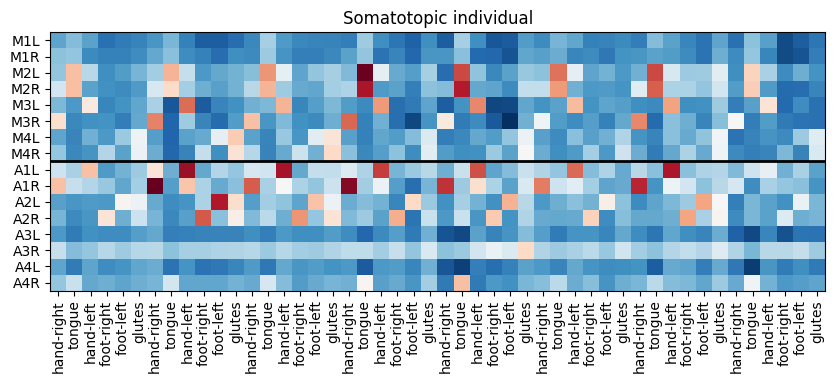

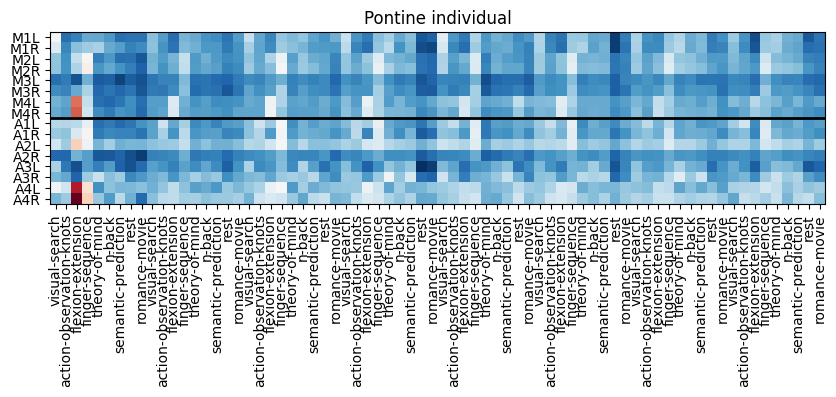

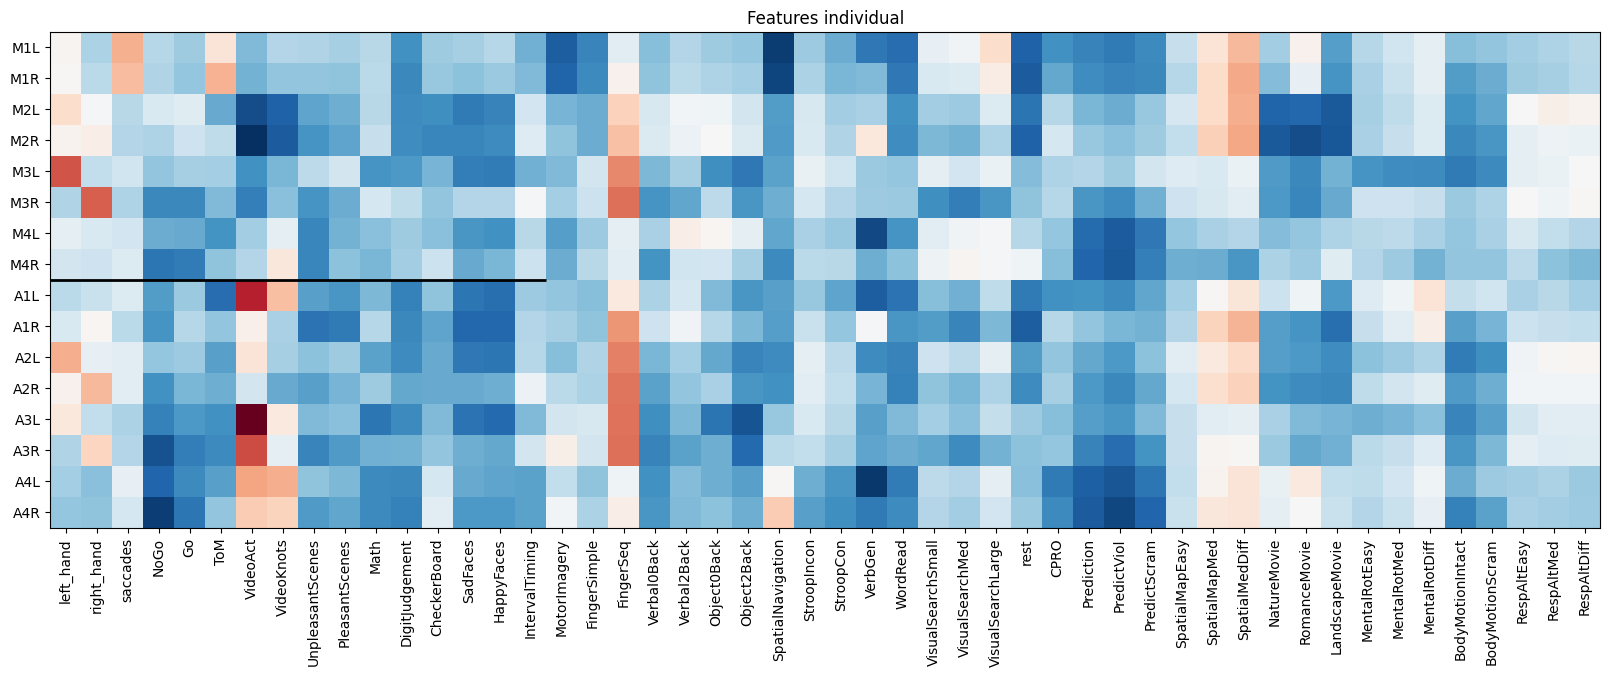

In [139]:
# Plot individual
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic.condition.tolist())),
           Somatotopic.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Somatotopic.index.tolist()) - 0.5, color='black', linewidth=2)
plt.title('Somatotopic individual')

plt.figure(figsize=(10, 10))
plt.imshow(Pontine[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine.condition.tolist())),
           Pontine.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Pontine.index.tolist())-0.5, color='black', linewidth=2)
plt.title('Pontine individual')

plt.figure(figsize=(20, 20))
plt.imshow(Features.loc[select_regions], cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Features.loc[select_regions].columns.tolist())),
           Features.loc[select_regions].columns.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
              len(Features.loc[select_regions].index.tolist())-0.5, color='black', linewidth=2)
plt.title('Features individual')

In [142]:

Somatotopic_avg = Somatotopic.groupby(['condition']).mean().reset_index()
Pontine_avg = Pontine.groupby(['condition']).mean().reset_index()
Somatotopic_avg

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_84554/2444659758.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Somatotopic_avg = Somatotopic.groupby(['condition']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_84554/2444659758.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Pontine_avg = Pontine.groupby(['condition']).mean().reset_index()


,condition,participant_num,M1L,M2L,M3L,M4L,A1L,A2L,A3L,A4L,...,A3R,A4R,D1R,D2R,D3R,D4R,S1R,S2R,S3R,S4R
0,foot-left,0.0,-0.200137,-0.005274,-0.120385,0.103899,0.095273,0.522778,-0.127606,-0.116318,...,0.119252,-0.053084,0.204714,-0.073428,0.208019,-0.104236,-0.190695,-0.158300,-0.123003,0.079621
1,foot-right,0.0,-0.196118,-0.050133,-0.175315,-0.057313,-0.008366,-0.025645,-0.122173,-0.111424,...,0.157556,-0.024799,0.269567,-0.056558,0.289007,-0.042237,-0.164074,-0.106317,-0.113738,0.109432
2,glutes,0.0,-0.118704,0.050996,-0.040959,0.313034,0.089432,0.211249,-0.055814,-0.070801,...,0.204477,0.018107,0.306941,-0.047517,0.347934,0.179675,-0.152028,0.022516,-0.054804,0.072138
3,hand-left,0.0,-0.069475,0.190650,0.586860,-0.003530,0.751534,-0.009036,-0.086191,-0.060655,...,0.123713,-0.027577,0.244917,-0.065689,0.177580,-0.073507,-0.163048,-0.165006,-0.106029,0.060714
4,hand-right,0.0,-0.135276,-0.004779,-0.063894,-0.080202,0.171343,-0.069028,-0.119989,-0.097894,...,0.125521,-0.010779,0.295744,-0.056944,0.215744,-0.043410,-0.145872,-0.146919,-0.099932,0.063913
5,tongue,0.0,0.053291,0.710809,-0.090398,-0.139984,0.111723,0.001867,-0.202472,-0.225792,...,0.066407,0.266936,0.450675,-0.373052,0.072750,0.105331,-0.168698,-0.120087,-0.144792,-0.356933


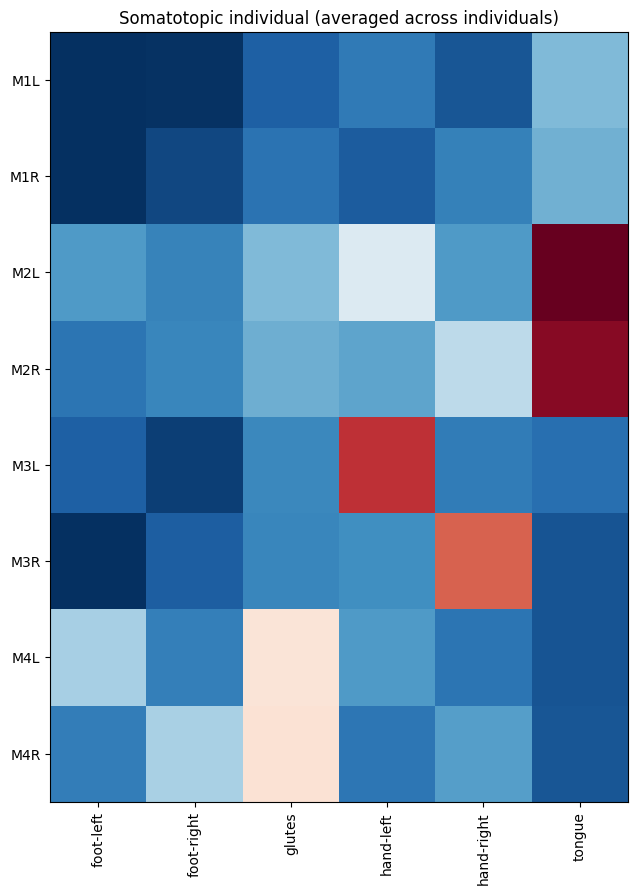

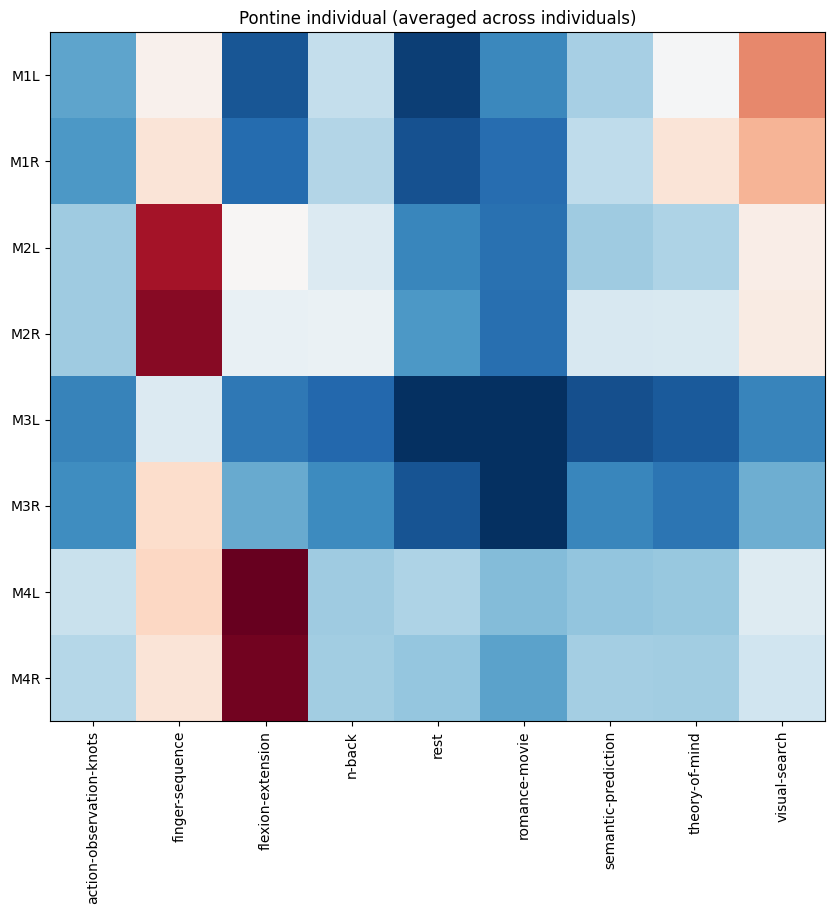

In [147]:
# Plot individual average
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_avg[motor_regions].T, cmap=cmap)
plt.yticks(np.arange(len(motor_regions)), motor_regions)
plt.xticks(np.arange(len(Somatotopic_avg.condition.tolist())),
           Somatotopic_avg.condition.tolist(), rotation=90)
plt.title('Somatotopic individual (averaged across individuals)')
plt.savefig(ut.figure_dir + 'Somatotopic_individual_avg.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(10, 10))
plt.imshow(Pontine_avg[motor_regions].T, cmap=cmap)
plt.yticks(np.arange(len(motor_regions)), motor_regions)
plt.xticks(np.arange(len(Pontine_avg.condition.tolist())),
           Pontine_avg.condition.tolist(), rotation=90)
plt.title('Pontine individual (averaged across individuals)')
plt.savefig(ut.figure_dir + 'Pontine_individual_avg.png', dpi=300, bbox_inches='tight')

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_84554/1347904542.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Somatotopic_mean = Somatotopic_group.groupby(


Text(0.5, 1.0, 'Pontine group')

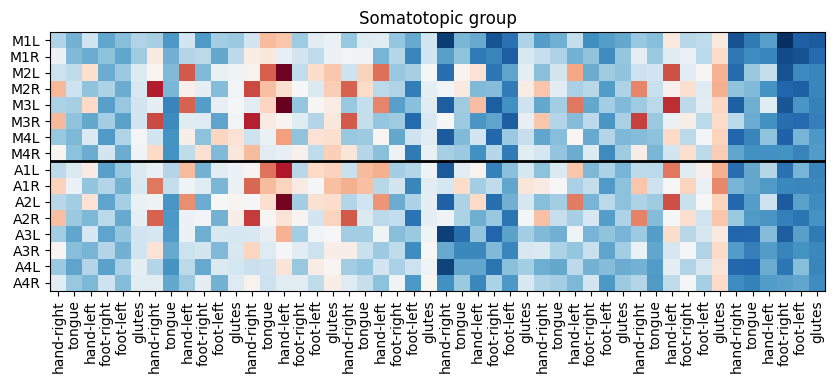

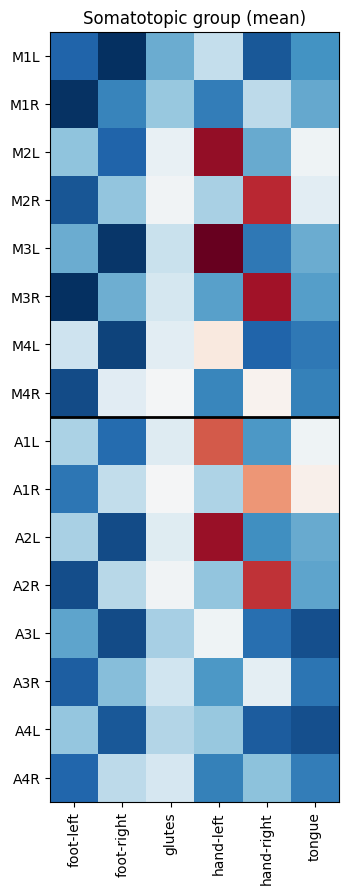

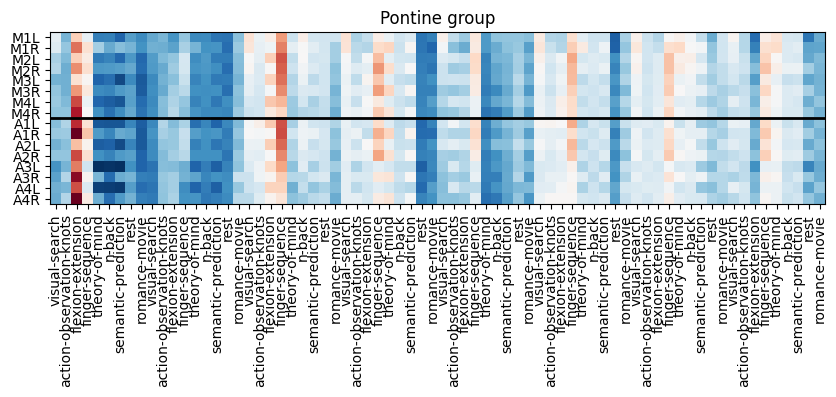

In [140]:
# Plot group
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_group[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic_group.condition.tolist())),
              Somatotopic_group.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,

              len(Somatotopic_group.index.tolist())-0.5, color='black', linewidth=2)
plt.title('Somatotopic group')

# Plot group
Somatotopic_mean = Somatotopic_group.groupby(
    ['condition']).mean()[select_regions].T
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_mean, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic_mean.columns.tolist())),
           Somatotopic_mean.columns.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Somatotopic_mean.columns.tolist()) - 0.5, color='black', linewidth=2)
plt.title('Somatotopic group (mean)')


plt.figure(figsize=(10, 10))
plt.imshow(Pontine_group[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine_group.condition.tolist())),
                Pontine_group.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,

                len(Pontine_group.index.tolist())-0.5, color='black', linewidth=2)
plt.title('Pontine group')

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_84554/1428232048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg = IBC.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_84554/1428232048.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg = Nishimoto.groupby('condition').mean()


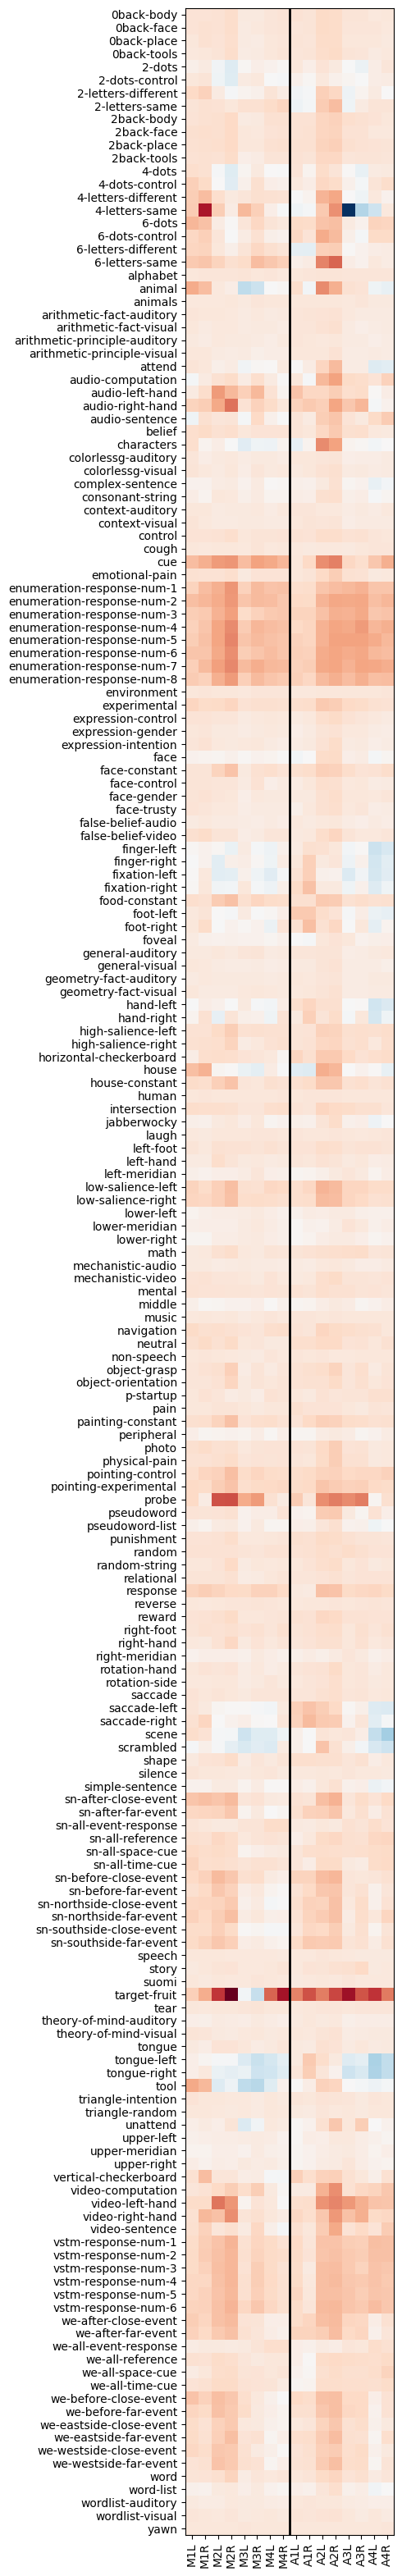

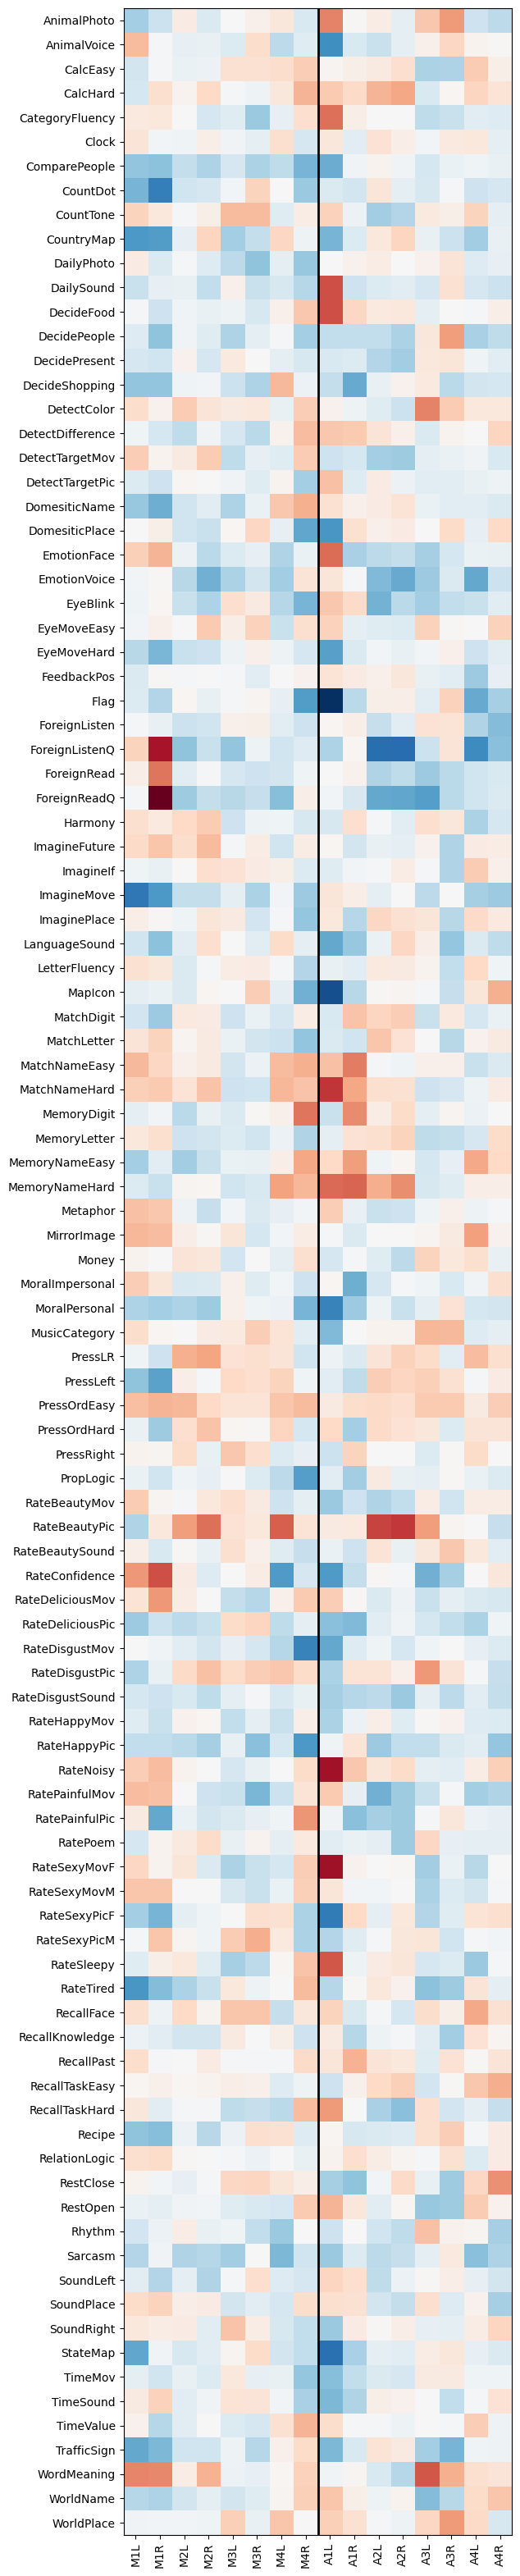

In [50]:
IBC_avg = IBC.groupby('condition').mean()
# IBC_avg[regions] = normalize(IBC_avg[regions])

Nishimoto_avg = Nishimoto.groupby('condition').mean()
# Nishimoto_avg[regions] = normalize(Nishimoto_avg[regions])
# --- IBC & Nishimoto ----
plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(IBC_avg.index.tolist())),
           IBC_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
                len(IBC_avg.index.tolist()) - 0.5, color='black', linewidth=2)

select_regions = motor_regions + action_regions
plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg.index.tolist())),
           Nishimoto_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
              len(Nishimoto_avg.index.tolist()) - 0.5, color='black', linewidth=2)

In [51]:
# Melt
T = Feature_regions.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


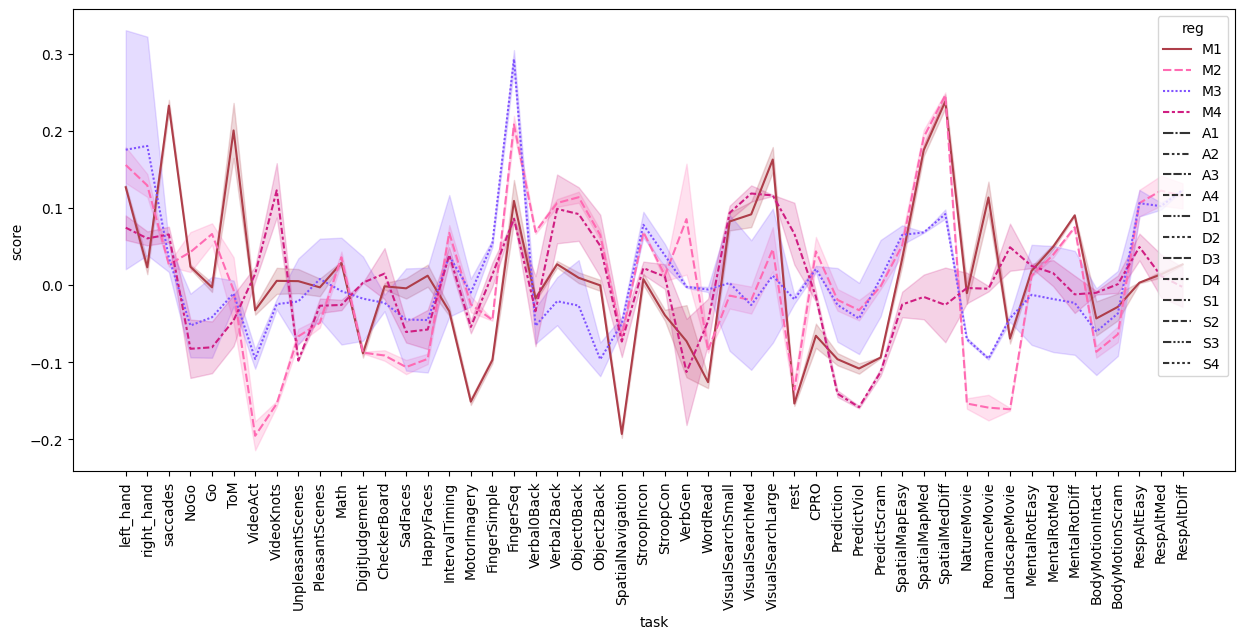

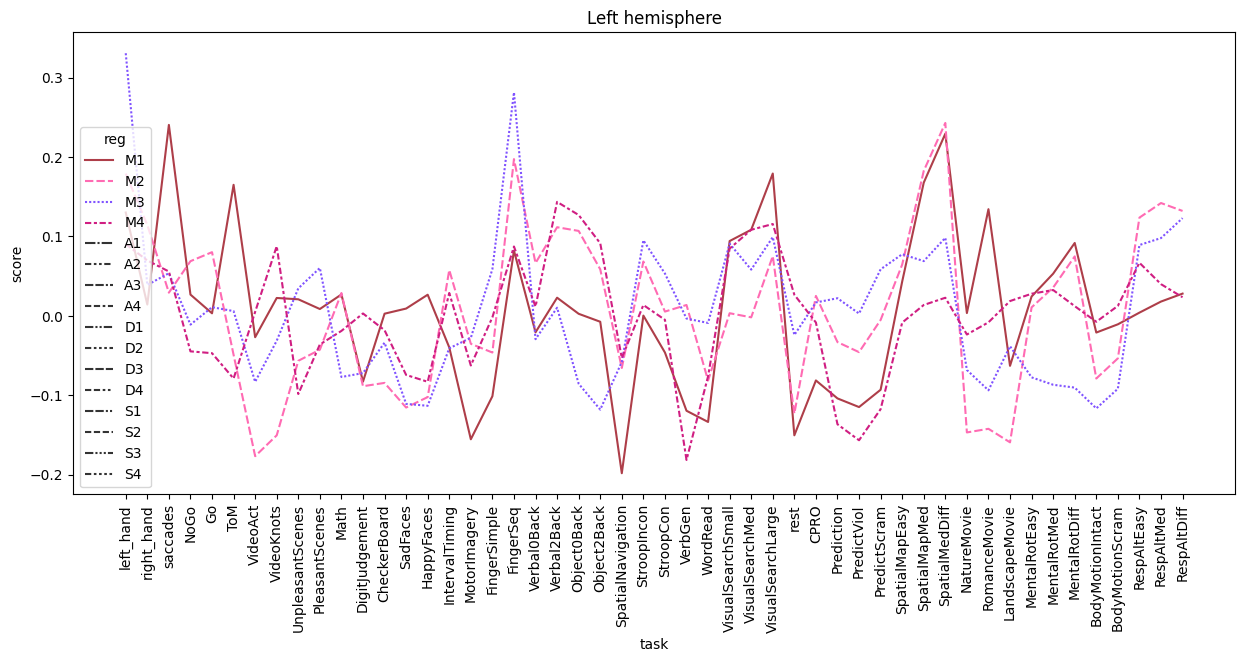

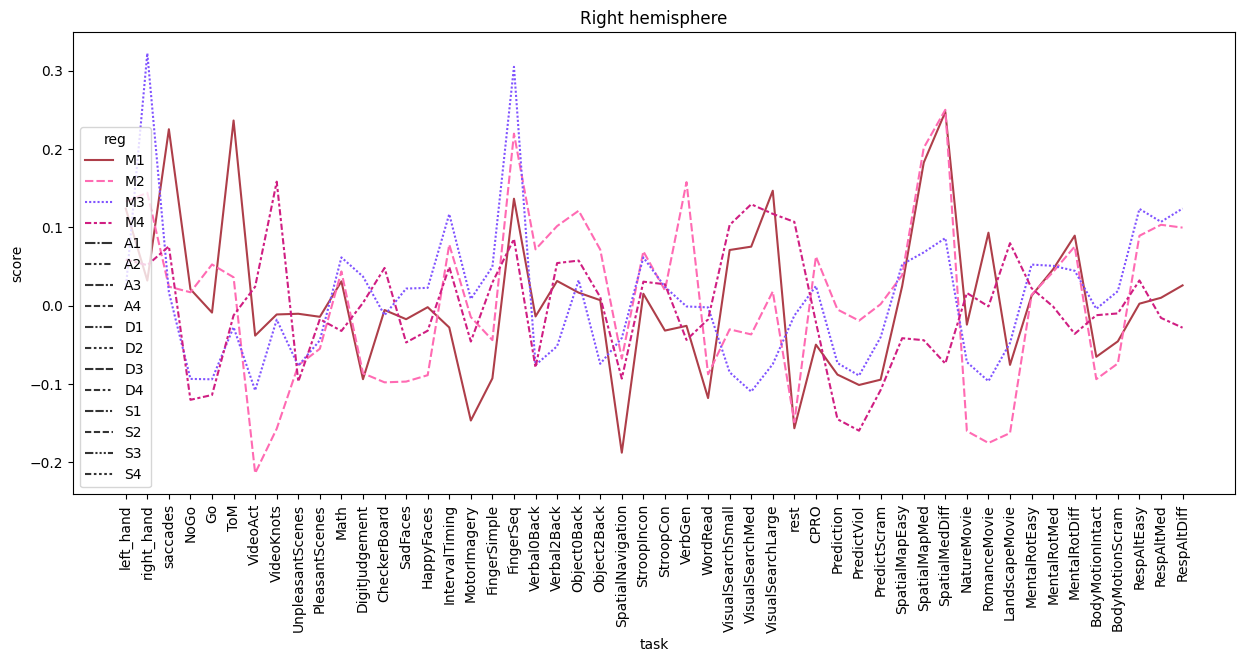

In [52]:
plt.figure(figsize=(15, 6))
sb.lineplot(data=T, x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side=='L'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
plt.title('Left hemisphere')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side == 'R'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
plt.title('Right hemisphere')
xt = plt.xticks(rotation=90)


# Compare left and right hemisphere

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:143: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:146: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:147: FutureWarning: The default value of 

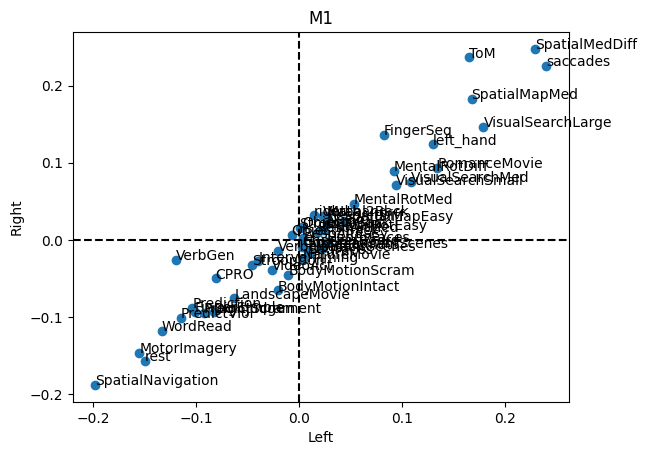

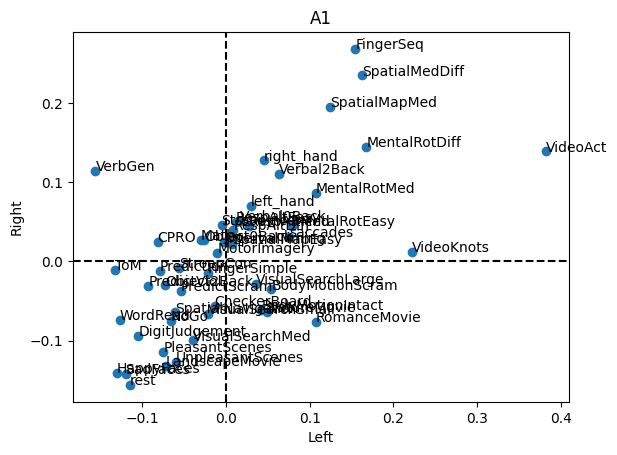

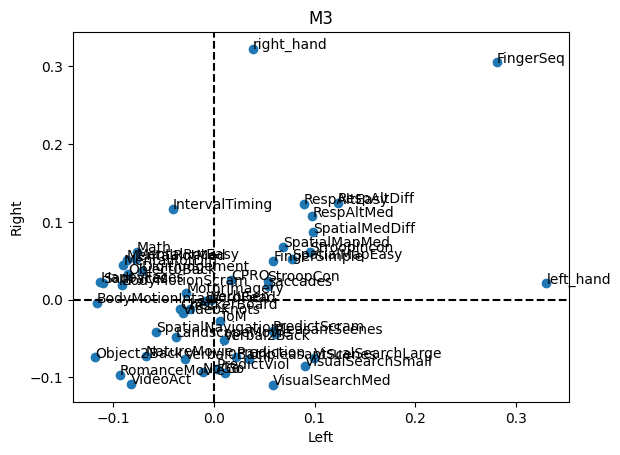

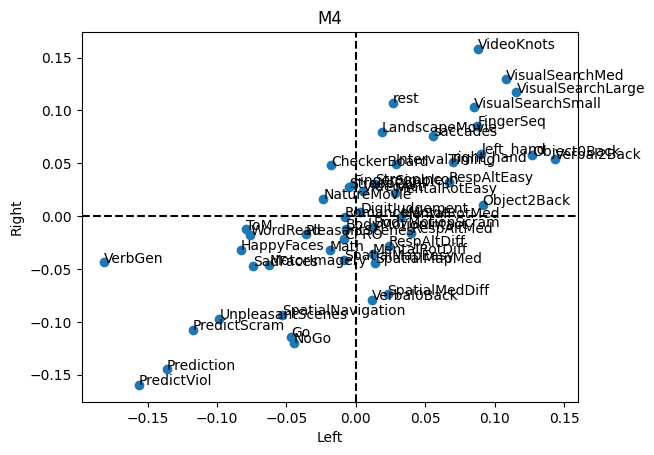

In [57]:
fm.scatter_plot_hemispheres('M1', T)
plt.figure()
fm.scatter_plot_hemispheres('A1', T)
plt.figure()
fm.scatter_plot_hemispheres('M3', T)
plt.figure()
fm.scatter_plot_hemispheres('M4', T)

# Plot differentiating tasks

([<matplotlib.axis.XTick at 0x7fa190b6a550>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

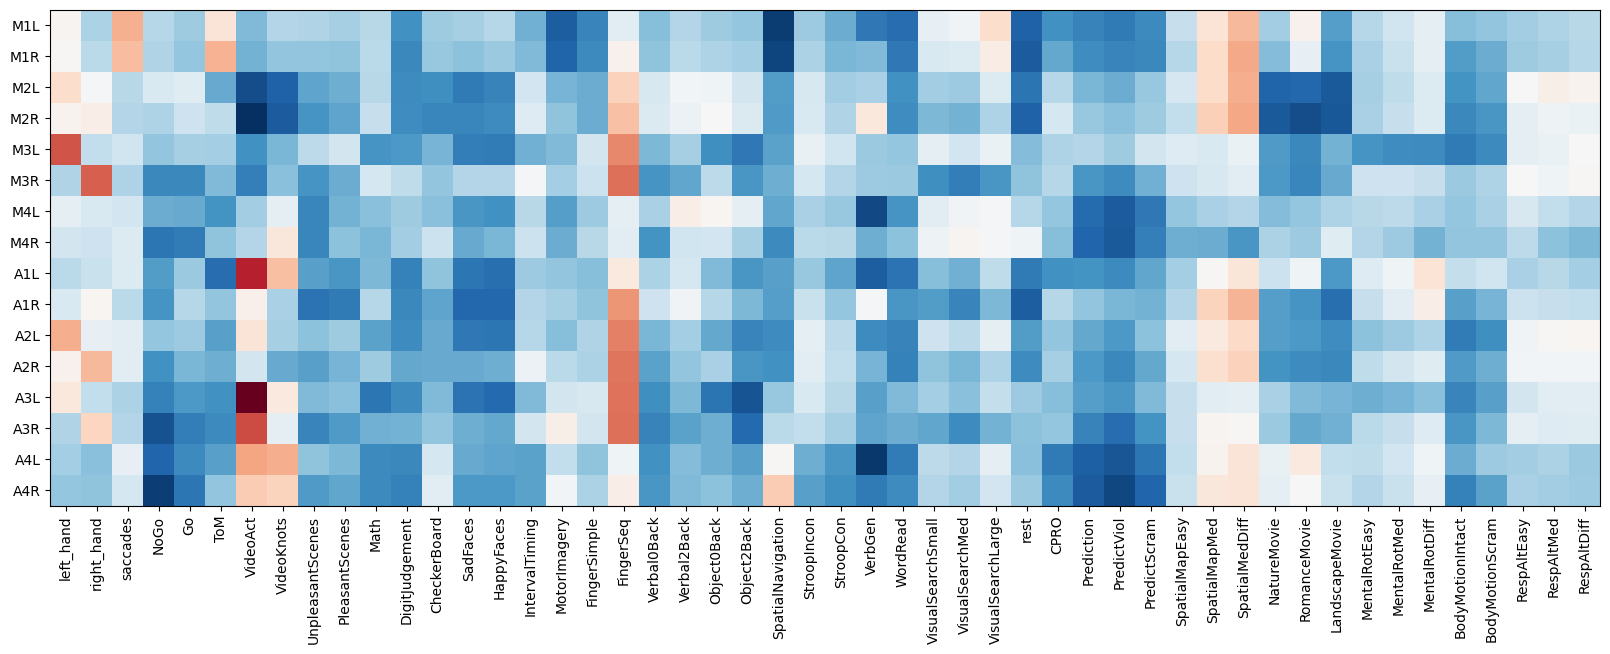

In [65]:
plt.figure(figsize=(20, 20))
plt.imshow(Features.loc[select_regions], cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Features.loc[select_regions].columns.tolist())),
           Features.loc[select_regions].columns.tolist(), rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:171: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

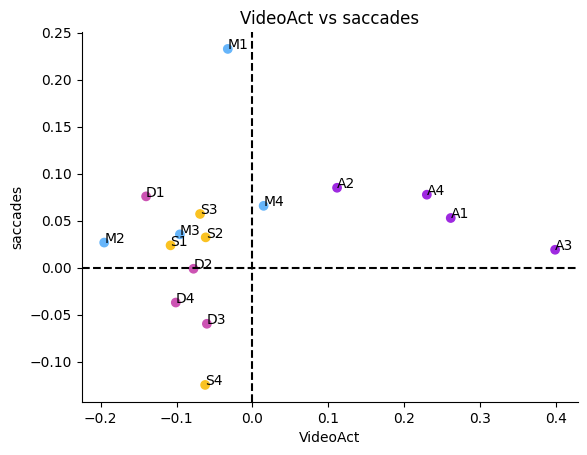

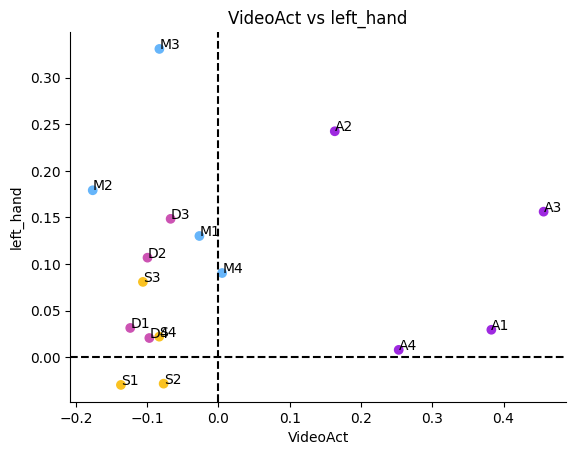

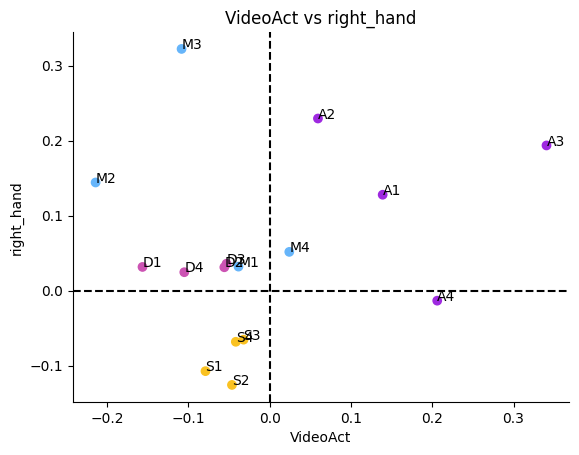

In [71]:
compare = ['VideoAct', 'saccades']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')
# Remove box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['VideoAct', 'left_hand']
fm.scatter_plot_tasks(compare, T[T.side=='L'], ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['VideoAct', 'right_hand']
fm.scatter_plot_tasks(compare, T[T.side == 'R'],
                      ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [95]:
S

,index,region,score,task,side,reg,domains
0,hand-right,M1L,-0.034771,hand-right,L,M1,M
1,tongue,M1L,0.033617,tongue,L,M1,M
2,hand-left,M1L,-0.040855,hand-left,L,M1,M
3,foot-right,M1L,-0.194028,foot-right,L,M1,M
4,foot-left,M1L,-0.160436,foot-left,L,M1,M
...,...,...,...,...,...,...,...
1531,tongue,S4R,-0.370942,tongue,R,S4,S
1532,hand-left,S4R,0.026850,hand-left,R,S4,S
1533,foot-right,S4R,0.181261,foot-right,R,S4,S
1534,foot-left,S4R,0.246181,foot-left,R,S4,S


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:171: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

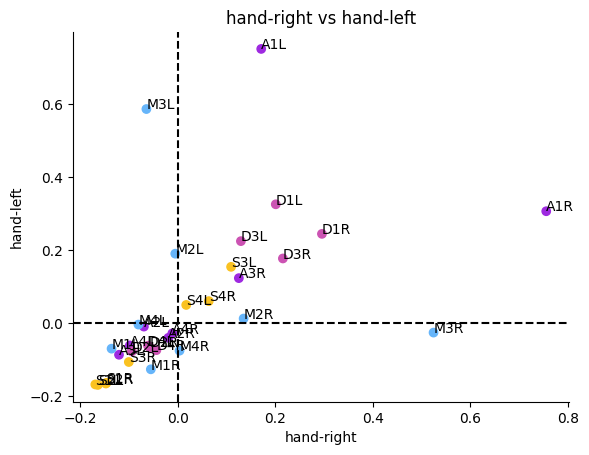

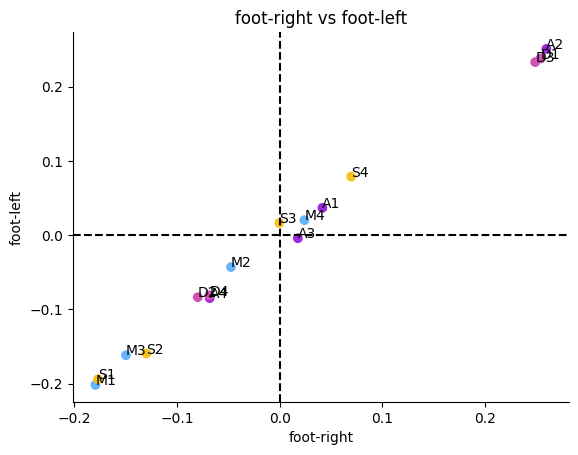

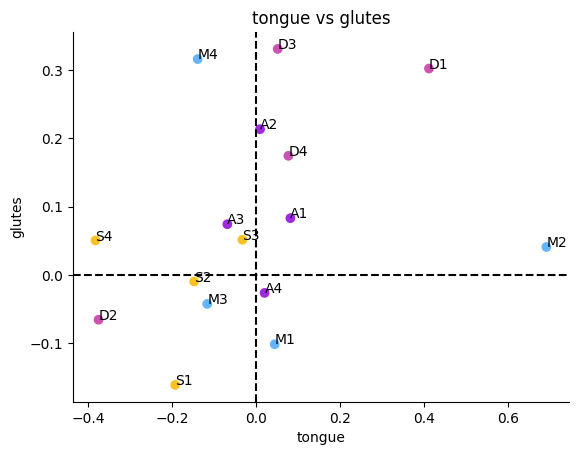

In [98]:
# Melt Somatotopic dataframe so that each row is a region task pair and the columns are index (region), task, score
# Make the index the region and the columns the condition
S = deepcopy(Somatotopic[regions + ['condition']])
S.index = S.condition
S.index.name = None
S = S.drop(columns='condition')
# Melt
S = S.reset_index().melt(id_vars='index', value_vars=S.columns.tolist(),
                                       var_name='region', value_name='score')

S['task'] = S['index']
S['index'] = S['region']
# # Split region into side and region
S['side'] = S.region.str[-1]
S['reg'] = S.region.str[0:2]
S['domains'] = S.region.str[0]

compare = ['hand-right', 'hand-left']
fm.scatter_plot_tasks(compare, S, ignore_side=False, color='domains')
# Remove box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['foot-right', 'foot-left']
fm.scatter_plot_tasks(compare, S,
                      ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['tongue', 'glutes']
fm.scatter_plot_tasks(compare, S,
                      ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:171: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

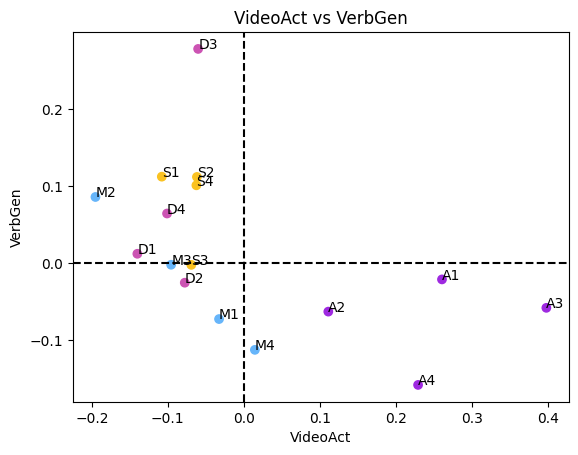

In [60]:
compare = ['VideoAct', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:171: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

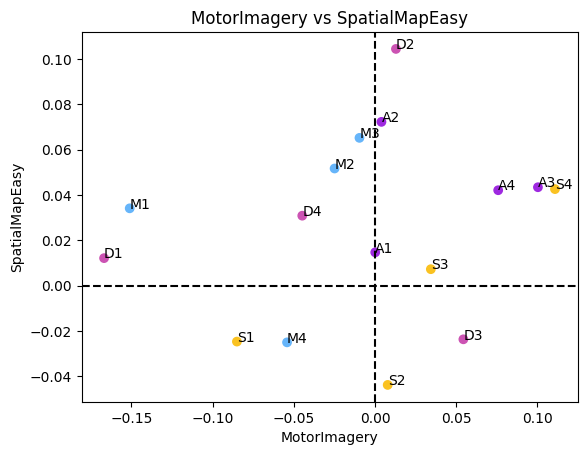

In [62]:
compare = ['MotorImagery', 'SpatialMapEasy']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


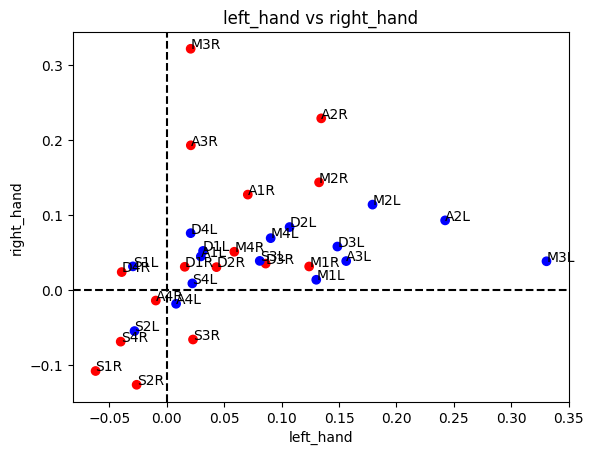

In [63]:
compare = ['left_hand', 'right_hand']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
plt.savefig(
    ut.figure_dir + f'localizers_motor_{compare[0]}_{compare[1]}_left-right_hand.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


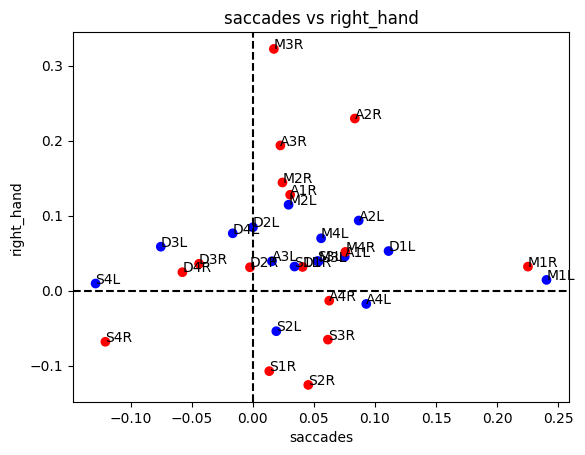

In [64]:
compare = ['saccades', 'right_hand']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
